In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression as lir
import pickle as pk
from math import sin
from matplotlib import pylab
from pylab import *
import os

## Taking Input Mass Media

In [2]:
pkey=0
base=0
years=7
district = "agra"

In [3]:
file1 = open("/Users/abhishekyadav/Documents/Study/BTP/city_to_article/Data/up/mediaDataVectors_"+district+"_big.pk",'rb')
data = pk.load(file1)
month_vector = pk.load(file1)
vocablury = pk.load(file1)
file1.close()
data = pd.Series(data[:years*12])

## Raw Data Plotting

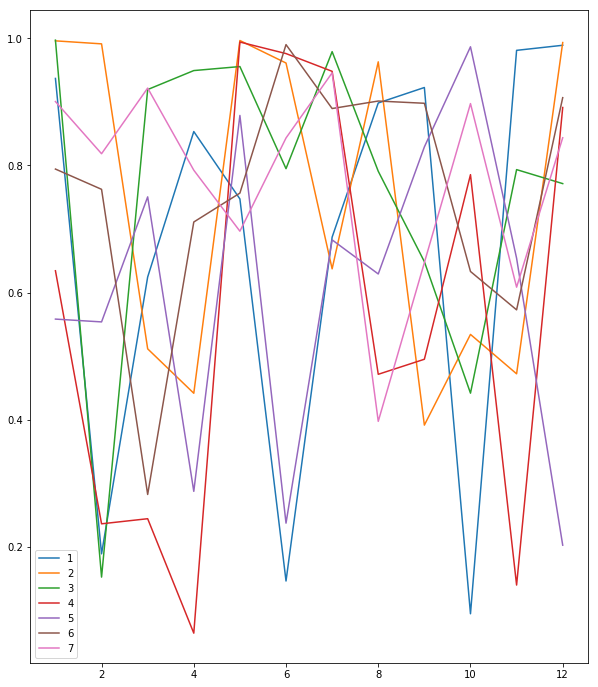

In [4]:
xaxis = np.arange(1,13)
year = np.arange(1,years+1)
plt.figure(figsize=(10,12))
for i in range(years):
    yaxis = np.array(data[base+i*12:base+(i+1)*12].tolist(),dtype=np.float32)
    plt.plot(xaxis,yaxis)
    plt.legend(year)
# print(data)

## Data Transformation 2

#### Trend

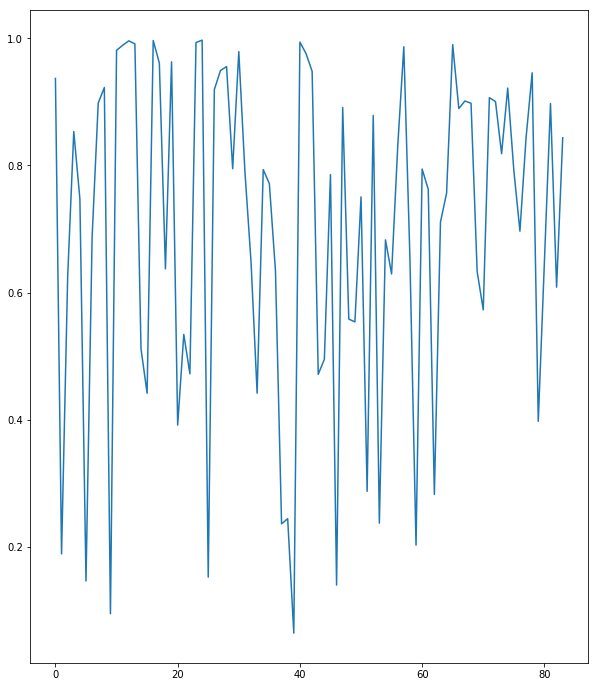

In [5]:
xaxis = np.arange(0,years*12)
plt.figure(figsize=(10,12))
yaxis = np.array(data[base:].tolist(),dtype=np.float32)
plt.plot(xaxis,yaxis)

#### Detrend

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


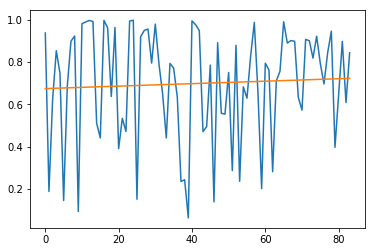

In [6]:
# use regression line method
X = [i for i in range(0, len(yaxis))]
X = np.reshape(X, (len(X), 1))
y = yaxis
model = lir()
model.fit(X, y)
# calculate trend
yaxis1 = model.predict(X)
plt.plot(X,yaxis)
plt.plot(X,yaxis1)

#### Detrend2

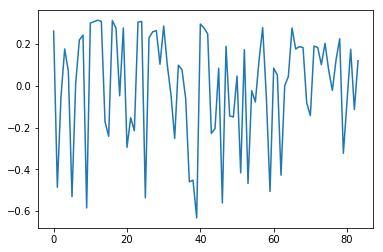

In [7]:
yaxis2 = [yaxis[i]-yaxis1[i] for i in range(0,len(yaxis))]
plt.plot(xaxis,yaxis2)

#### Detrend3

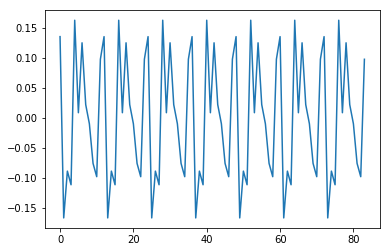

In [8]:
yaxis3=[]
for i in range(len(yaxis2)):
    sum1=0
    for j in range(years):
        sum1+=yaxis2[i%12+12*j]
    yaxis3.append(sum1/years)
plt.plot(xaxis,yaxis3)

#### Final

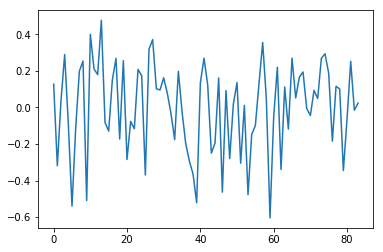

In [9]:
noise = [yaxis[i]-yaxis1[i]-yaxis3[i] for i in range(len(yaxis))]
plt.plot(xaxis,noise)

## Anomaly Detection

In [2]:
directory_in_str = "/Users/abhishekyadav/Documents/Study/BTP/city_to_article/Data/"
state = "up"
directory = directory_in_str + state
result_dir = directory_in_str + state + "_result"
if not os.path.exists(result_dir):
    os.makedirs(result_dir)

In [3]:
def detrend(date):
    xaxis = np.arange(0,years*12)
    yaxis = np.array(data[base:],dtype=np.float32)
    X = [i for i in range(0, len(yaxis))]
    X = np.reshape(X, (len(X), 1))
    y = yaxis
    model = lir()
    model.fit(X, y)
    yaxis1 = model.predict(X)
    yaxis2 = [yaxis[i]-yaxis1[i] for i in range(0,len(yaxis))]
    yaxis3=[]
    for i in range(len(yaxis2)):
        sum1=0
        for j in range(years):
            sum1+=yaxis2[i%12+12*j]
        yaxis3.append(sum1/years)
    noise = [yaxis[i]-yaxis1[i]-yaxis3[i] for i in range(len(yaxis))]
    return noise
    
def peakdet(v, thresh):
    maxthresh = []
    minthresh = []
    peaks = []
    valleys = []

    for x, y in v:
        if y > thresh:
            maxthresh.append((x, y))
        elif y < -thresh:
            minthresh.append((x, y))

    for x, y in maxthresh:
        try:
            if (v[x - 1][1] < y) & (v[x + 1][1] < y):
                peaks.append((x, y))
        except Exception:
            pass

    for x, y in minthresh:
        try:
            if (v[x - 1][1] > y) & (v[x + 1][1] > y):
                valleys.append((x, y))
        except Exception:
            pass

    return peaks, valleys

/Users/abhishekyadav/Documents/Study/BTP/city_to_article/Data/up/mediaDataVectors_allahabad_big.pk
25
2011-03
2011-06
2011-08
2012-10
2013-01
2013-02
2013-04
2013-08
2013-12
2014-03
2014-05
2014-08
2014-11
2015-01
2015-03
2015-04
2015-05
2015-06
2015-09
2015-12
2016-02
2016-11
2017-03
2017-06
2017-09


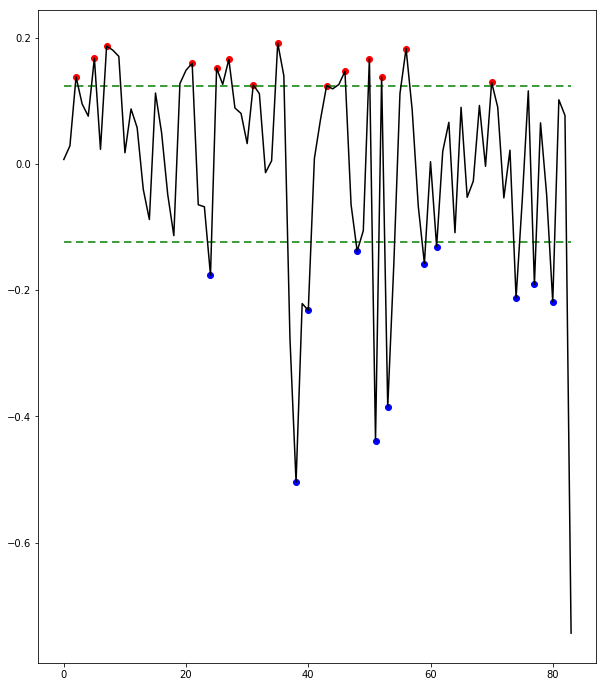

/Users/abhishekyadav/Documents/Study/BTP/city_to_article/Data/up/mediaDataVectors_meerut_big.pk
28
2011-01
2011-07
2011-08
2011-10
2011-12
2012-03
2012-05
2012-09
2012-12
2013-01
2013-04
2013-08
2014-02
2014-03
2014-04
2014-07
2014-11
2015-07
2015-08
2015-09
2015-10
2016-02
2016-06
2016-11
2017-03
2017-06
2017-09
2017-10


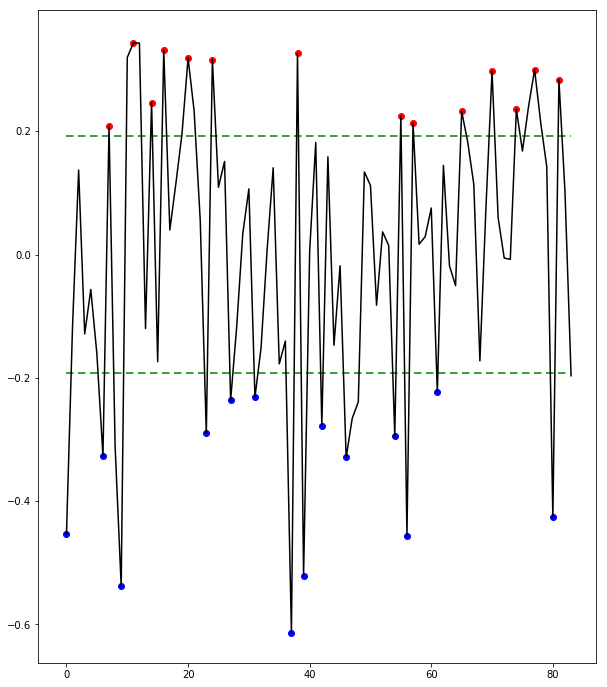

/Users/abhishekyadav/Documents/Study/BTP/city_to_article/Data/up/mediaDataVectors_lucknow_big.pk
18
2011-01
2011-05
2011-07
2011-09
2011-12
2012-02
2012-09
2012-11
2014-02
2015-06
2015-11
2016-05
2016-10
2017-01
2017-02
2017-03
2017-06
2017-08


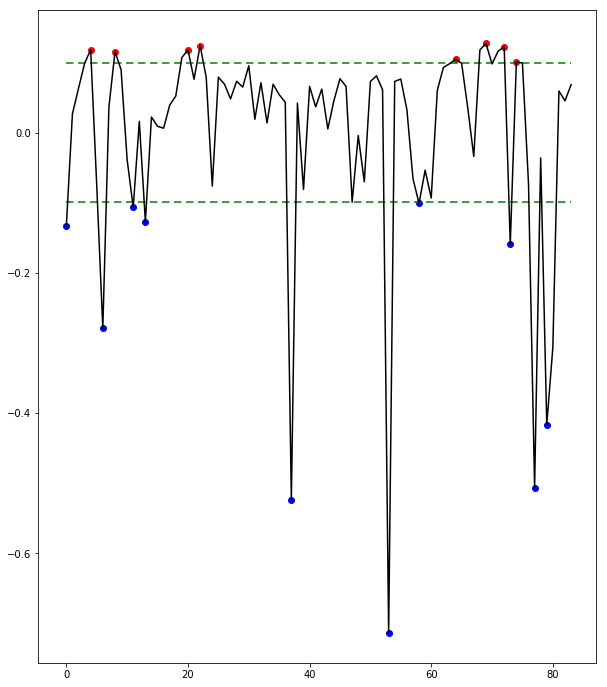

/Users/abhishekyadav/Documents/Study/BTP/city_to_article/Data/up/mediaDataVectors_varanasi_big.pk
31
2011-01
2011-04
2011-06
2011-11
2012-03
2012-05
2012-07
2012-09
2012-11
2013-03
2013-07
2013-09
2013-11
2014-02
2014-04
2014-05
2014-07
2014-09
2014-12
2015-04
2015-07
2015-08
2015-09
2015-11
2016-02
2017-01
2017-03
2017-04
2017-08
2017-09
2017-11


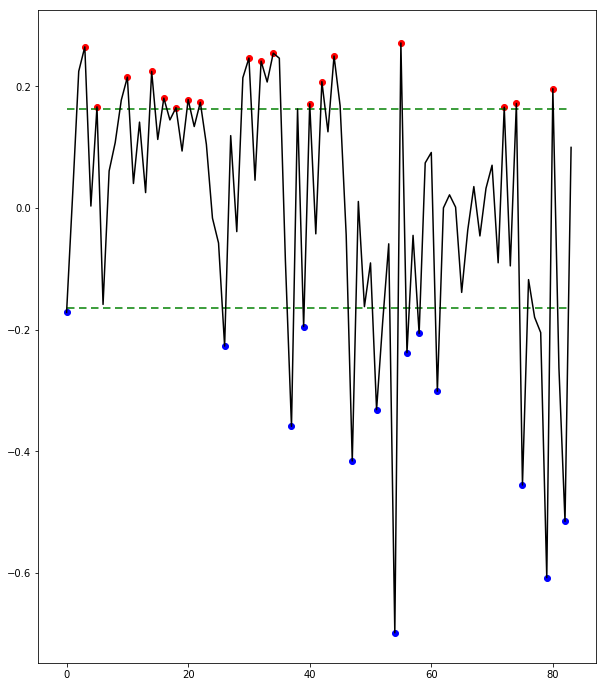

/Users/abhishekyadav/Documents/Study/BTP/city_to_article/Data/up/mediaDataVectors_ghaziabad_big.pk
37
2011-03
2011-05
2011-08
2011-10
2011-11
2011-12
2012-03
2012-05
2012-06
2012-07
2012-08
2012-10
2012-12
2013-02
2013-03
2013-05
2013-06
2013-11
2014-02
2014-03
2014-04
2014-08
2014-09
2014-10
2015-01
2015-02
2015-11
2015-12
2016-03
2016-07
2016-08
2016-12
2017-01
2017-06
2017-07
2017-08
2017-10


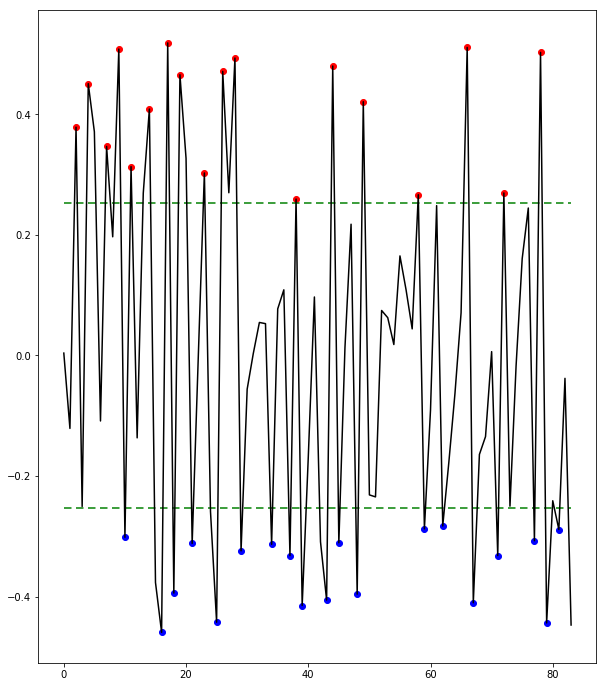

/Users/abhishekyadav/Documents/Study/BTP/city_to_article/Data/up/mediaDataVectors_agra_big.pk
30
2011-01
2011-02
2011-06
2011-09
2011-10
2012-01
2012-04
2012-05
2012-08
2012-09
2012-11
2013-01
2013-02
2013-05
2013-07
2013-10
2014-02
2014-04
2014-05
2014-08
2014-11
2015-04
2015-06
2015-10
2015-12
2016-03
2016-06
2017-03
2017-07
2017-08


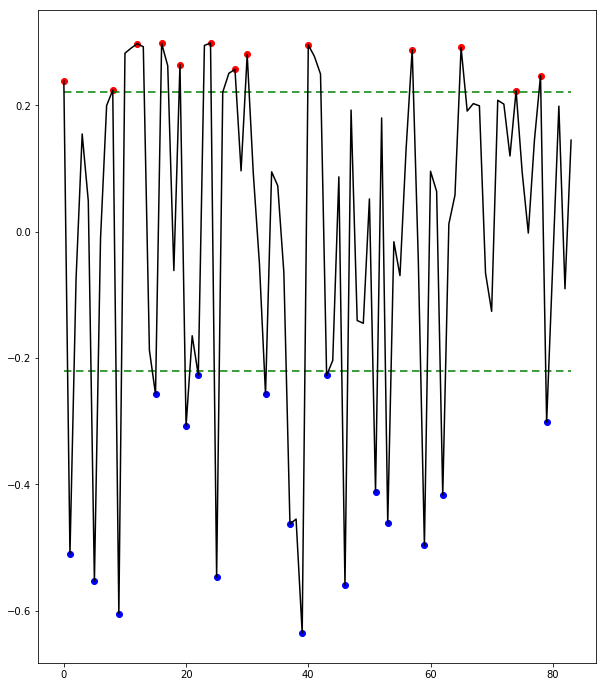

In [4]:
for filename in os.listdir(directory):
    if not(filename.endswith("big.pk")):
        continue
    
    pkey=0
    base=0
    years=7
    plt.figure(figsize=(10,12))
    print(directory + "/" + filename)
    
    file1 = open(directory + "/" + filename,'rb')
    data = pk.load(file1)
    month_vector = pk.load(file1)
    vocablury = pk.load(file1)
    file1.close()
    
    data = pd.Series(data[:years*12])
    mean = np.mean(data)
    xaxis = np.arange(0,years*12)
    
    for i in range(len(xaxis)):
        if(math.isnan(data[i])):
            data[i] = mean
    
#     data = detrend(data)
    
    yaxis = np.array(data[base:],dtype=np.float32)
    yaxis = yaxis - np.mean(yaxis)
#     plt.plot(xaxis,yaxis)

    arr = [(xaxis[i], yaxis[i]) for i in range(len(xaxis))]  # create a list of tuples where the tuples represent the (x, y) values of the function
    thresh = np.mean(abs(yaxis))

    peaks, valleys = peakdet(arr, thresh)
    anomalies = np.zeros(years*12, dtype=np.int32)
    for x, y in peaks:
        anomalies[x] = 1
    for x,y in valleys:
        anomalies[x] = 1
    
    i = 0
    final_vector = {}
    for key in sorted(month_vector.keys()):
        if(i >= len(anomalies)):
            break
        if(anomalies[i]==1):
            final_vector[key] = month_vector[key]
        i+=1
    
    print(len(final_vector))
    for key in sorted(final_vector.keys()):
        print(key)
        
    file1 = open(result_dir + "/" + filename,'wb')
    pk.dump(final_vector, file1)
    pk.dump(vocablury, file1)
    file1.close()

    scatter([x for x, y in peaks], [y for x, y in peaks], color = 'red')
    scatter([x for x, y in valleys], [y for x, y in valleys], color = 'blue')
    plot(xaxis, len(xaxis) * [thresh], color='green', linestyle='--', dashes=(5, 3))
    plot(xaxis, len(xaxis) * [-thresh], color='green', linestyle='--', dashes=(5, 3))
    plot(xaxis, yaxis, 'k')
    show()
    

## Transformed Data Plotting

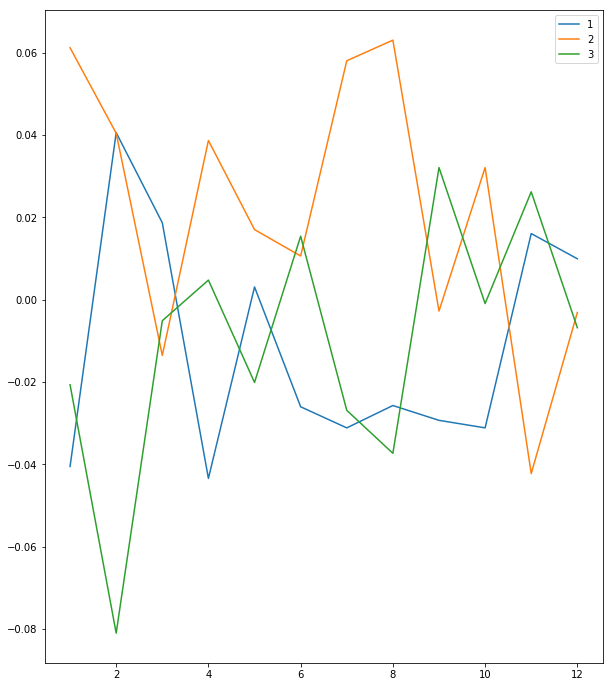

In [26]:
xaxis = np.arange(1,13)
year = np.arange(1,years+1)
plt.figure(figsize=(10,12))
for i in range(years):
    yaxis = np.array(noise[i*12:(i+1)*12],dtype=np.float32)
#     print(yaxis)
    plt.plot(xaxis,yaxis)
    plt.legend(year)

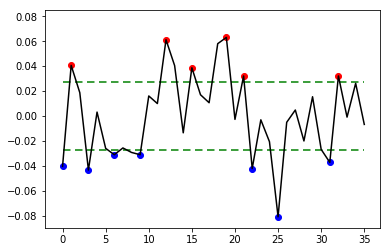

In [29]:
xaxis = np.arange(0,years*12)
yaxis = noise
mean = np.mean(yaxis)
yaxis = yaxis - mean

arr = [(xaxis[i], yaxis[i]) for i in range(len(xaxis))]  # create a list of tuples where the tuples represent the (x, y) values of the function
thresh = np.mean(abs(yaxis))

peaks, valleys = peakdet(arr, thresh)

scatter([x for x, y in peaks], [y for x, y in peaks], color = 'red')
scatter([x for x, y in valleys], [y for x, y in valleys], color = 'blue')
plot(xaxis, len(xaxis) * [thresh], color='green', linestyle='--', dashes=(5, 3))
plot(xaxis, len(xaxis) * [-thresh], color='green', linestyle='--', dashes=(5, 3))
plot(xaxis, yaxis, 'k')
show()